In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [3]:
# Define the target variable and numeric columns
target = 'thnoth_name'
numeric_cols_df_0 = df_0.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_0 = df_0.select_dtypes(exclude=[np.number]).columns.tolist()

In [4]:
# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_0 = [col for col in numeric_cols_df_0 if col not in string_cols_df_0]

In [5]:
# Train a RandomForest model to get feature importances
X = df_0[numeric_cols_df_0]
y = df_0[target]

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [7]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

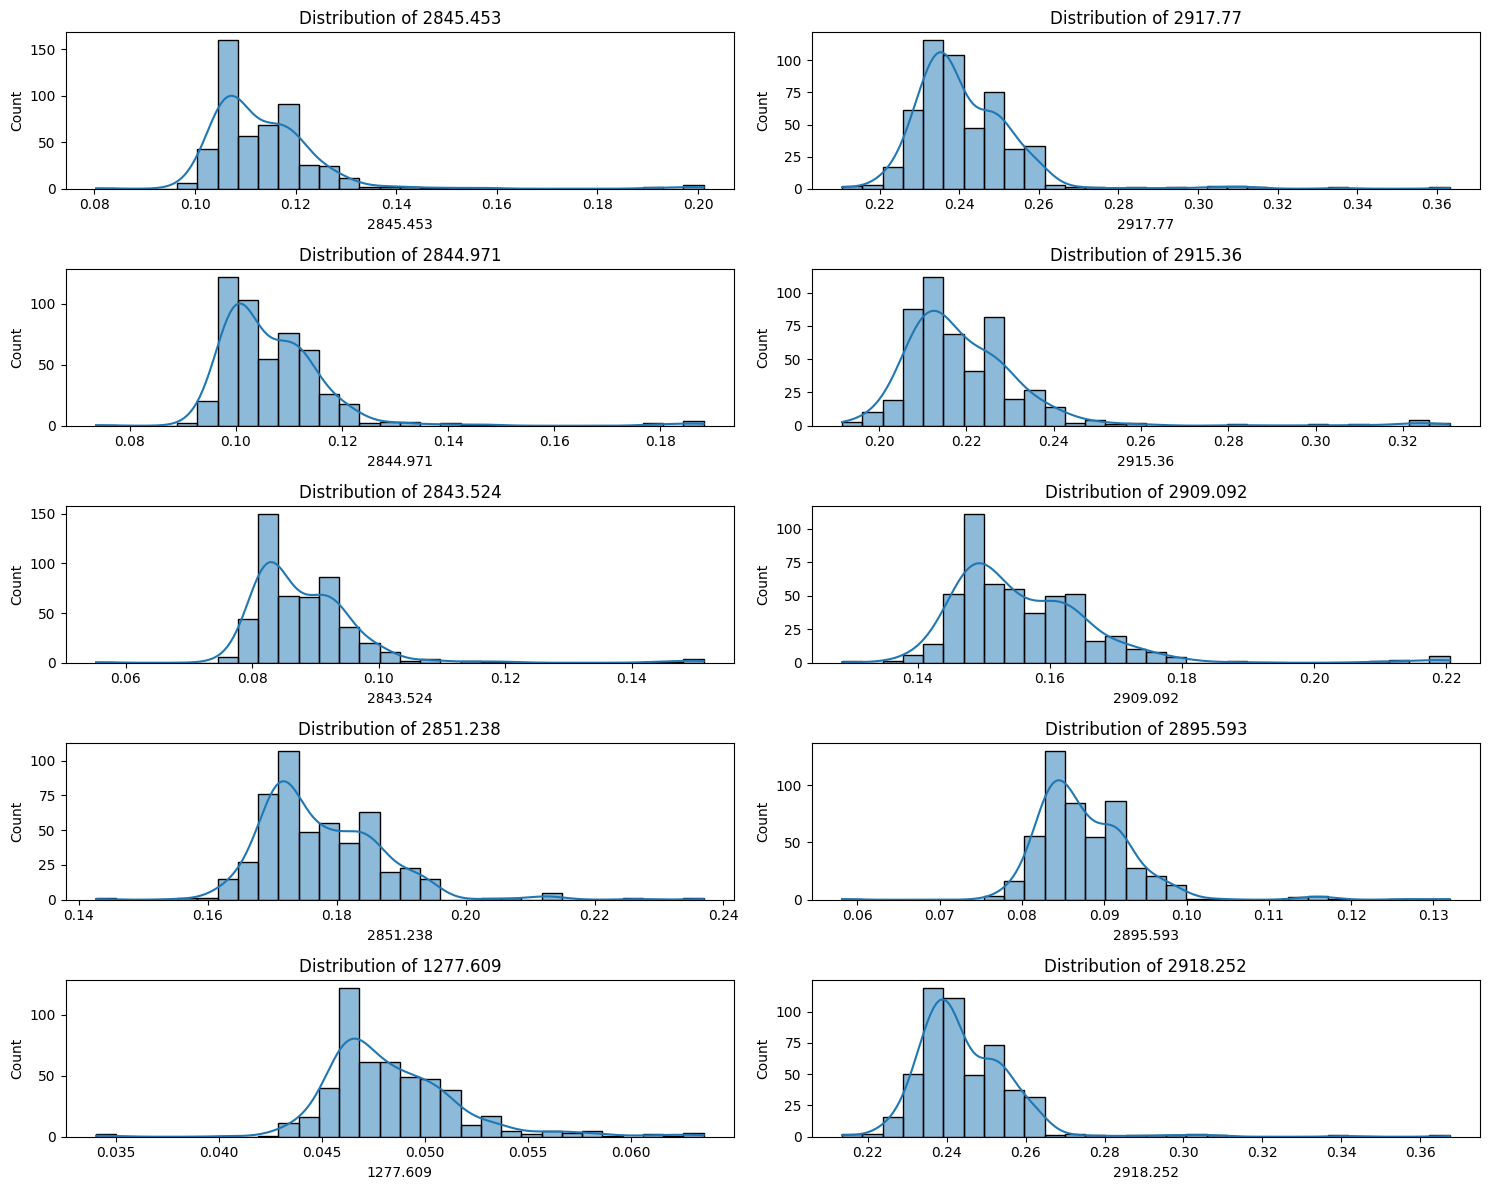

In [8]:
# Plot the distribution of the top 10 most important features
plt.figure(figsize=(15, 12))
for i, idx in enumerate(indices):
    plt.subplot(5, 2, i + 1)
    sns.histplot(df_0[numeric_cols_df_0[idx]], bins=30, kde=True)
    plt.title(f'Distribution of {numeric_cols_df_0[idx]}')
plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from the top 10 important features
top_features = [numeric_cols_df_0[idx] for idx in indices]
df_0_cleaned = remove_outliers_zscore(df_0, top_features)

# Check the shape of the cleaned dataframe
print("Original Data Shape:", df_0.shape)
print("Cleaned Data Shape:", df_0_cleaned.shape)


Original Data Shape: (503, 6958)
Cleaned Data Shape: (492, 6958)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the cleaned data into train and test sets
X_cleaned = df_0_cleaned[numeric_cols_df_0]
y_cleaned = df_0_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.5, random_state=42)

# Train the RandomForest model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Analyze accuracy per 'prov_char'
df_0_test_cleaned = df_0_cleaned.loc[X_test.index]
df_0_test_cleaned['predicted'] = y_pred
df_0_test_cleaned['actual'] = y_test.values

prov_char_analysis = df_0_test_cleaned.groupby('prov_char').apply(lambda x: (x['actual'] == x['predicted']).mean())
print(prov_char_analysis)


Classification Report:
               precision    recall  f1-score   support

    Non-Thai       0.95      0.70      0.81        80
        Thai       0.87      0.98      0.92       166

    accuracy                           0.89       246
   macro avg       0.91      0.84      0.86       246
weighted avg       0.90      0.89      0.89       246

Confusion Matrix:
 [[ 56  24]
 [  3 163]]
prov_char
BBX    0.454545
CBI    1.000000
CCO    1.000000
CPN    1.000000
JHR    1.000000
KBI    1.000000
KBX    0.181818
KRI    1.000000
KTX    0.913043
NRT    1.000000
NWT    1.000000
PKN    0.875000
PLG    1.000000
PNA    1.000000
PTN    1.000000
RIX    0.777778
RNG    1.000000
SGR    1.000000
SKM    1.000000
SNI    0.967742
SNK    1.000000
SSX    1.000000
STN    1.000000
SUX    0.666667
TRG    0.950000
dtype: float64


C:\Users\pingk\AppData\Local\Temp\ipykernel_33224\4156967957.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prov_char_analysis = df_0_test_cleaned.groupby('prov_char').apply(lambda x: (x['actual'] == x['predicted']).mean())


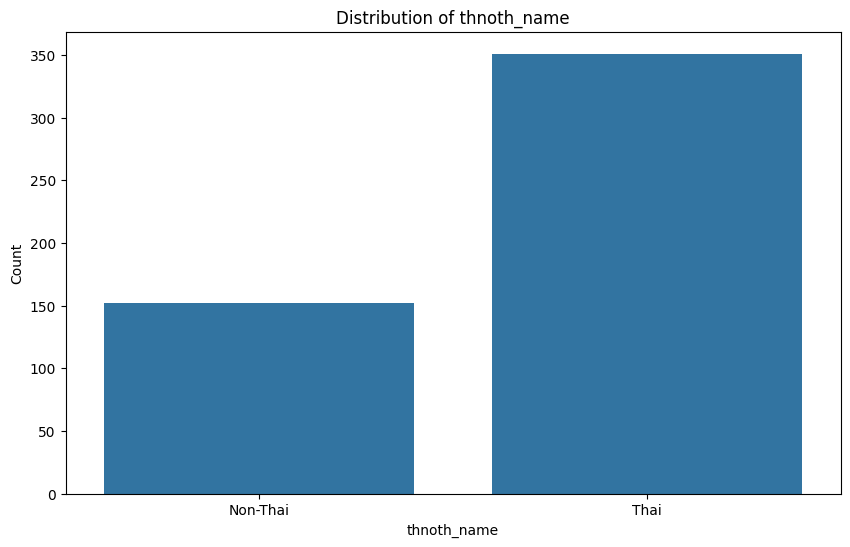

In [11]:
# Create a distribution plot for 'thnoth_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_0, x=target)
plt.title('Distribution of thnoth_name')
plt.xlabel('thnoth_name')
plt.ylabel('Count')
plt.show()

In [12]:
# Verify the new distribution
print("New distribution of thnoth_name:")
print(df_0_cleaned[target].value_counts())

New distribution of thnoth_name:
thnoth_name
Thai        350
Non-Thai    142
Name: count, dtype: int64


In [13]:
# Separate Thai and Non-Thai samples
df_0_thai = df_0[df_0[target] == 'Thai']
df_0_non_thai = df_0[df_0[target] == 'Non-Thai']

In [14]:
from sklearn.ensemble import IsolationForest

# Identify and remove outliers in Thai samples using Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(df_0_thai[numeric_cols_df_0])
mask = yhat != -1
df_0_thai_cleaned = df_0_thai[mask]

In [15]:
# Combine the cleaned Thai samples with Non-Thai samples

df_1_cleaned = pd.concat([df_0_thai_cleaned, df_0_non_thai], axis=0).reset_index(drop=True)

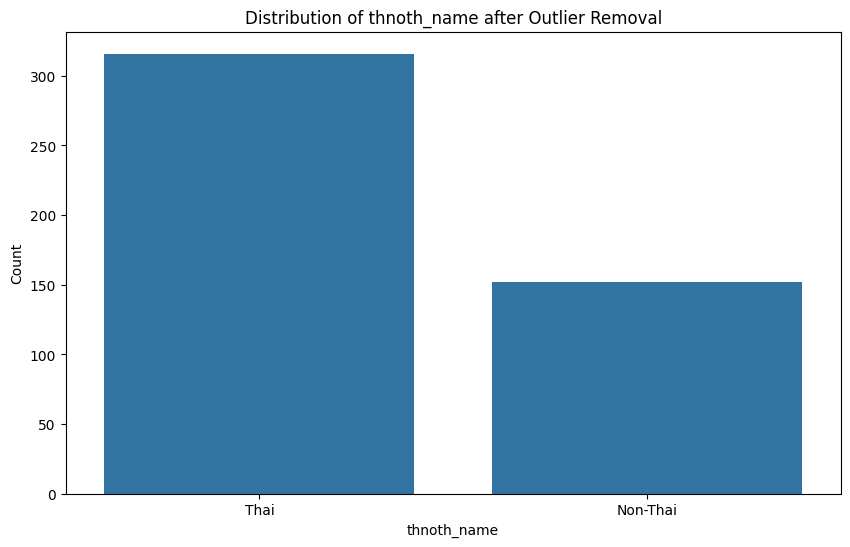

In [16]:
# Plot the distribution of thnoth_name after outlier removal
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1_cleaned, x=target)
plt.title('Distribution of thnoth_name after Outlier Removal')
plt.xlabel('thnoth_name')
plt.ylabel('Count')
plt.show()


In [17]:
df_1_cleaned.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new_cleaned.csv", index=False)

In [18]:
# Verify the new distribution
print("New distribution of thnoth_name:")
print(df_1_cleaned[target].value_counts())

New distribution of thnoth_name:
thnoth_name
Thai        316
Non-Thai    152
Name: count, dtype: int64


In [19]:
df_2 = df_1_cleaned.copy()

In [20]:
# Encode the 'thnoth_name' column
le = LabelEncoder()
df_2['thnoth_name_encoded'] = le.fit_transform(df_2['thnoth_name'])

# Define the target variable and numeric columns
numeric_cols = df_2.select_dtypes(include=[np.number]).columns.tolist()
X = df_2[numeric_cols].drop(columns=['thnoth_name_encoded'])
y = df_2['thnoth_name_encoded']

# Train a RandomForest model to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
top_30_features = feature_importances.sort_values(by='importance', ascending=False).head(30).index.tolist()

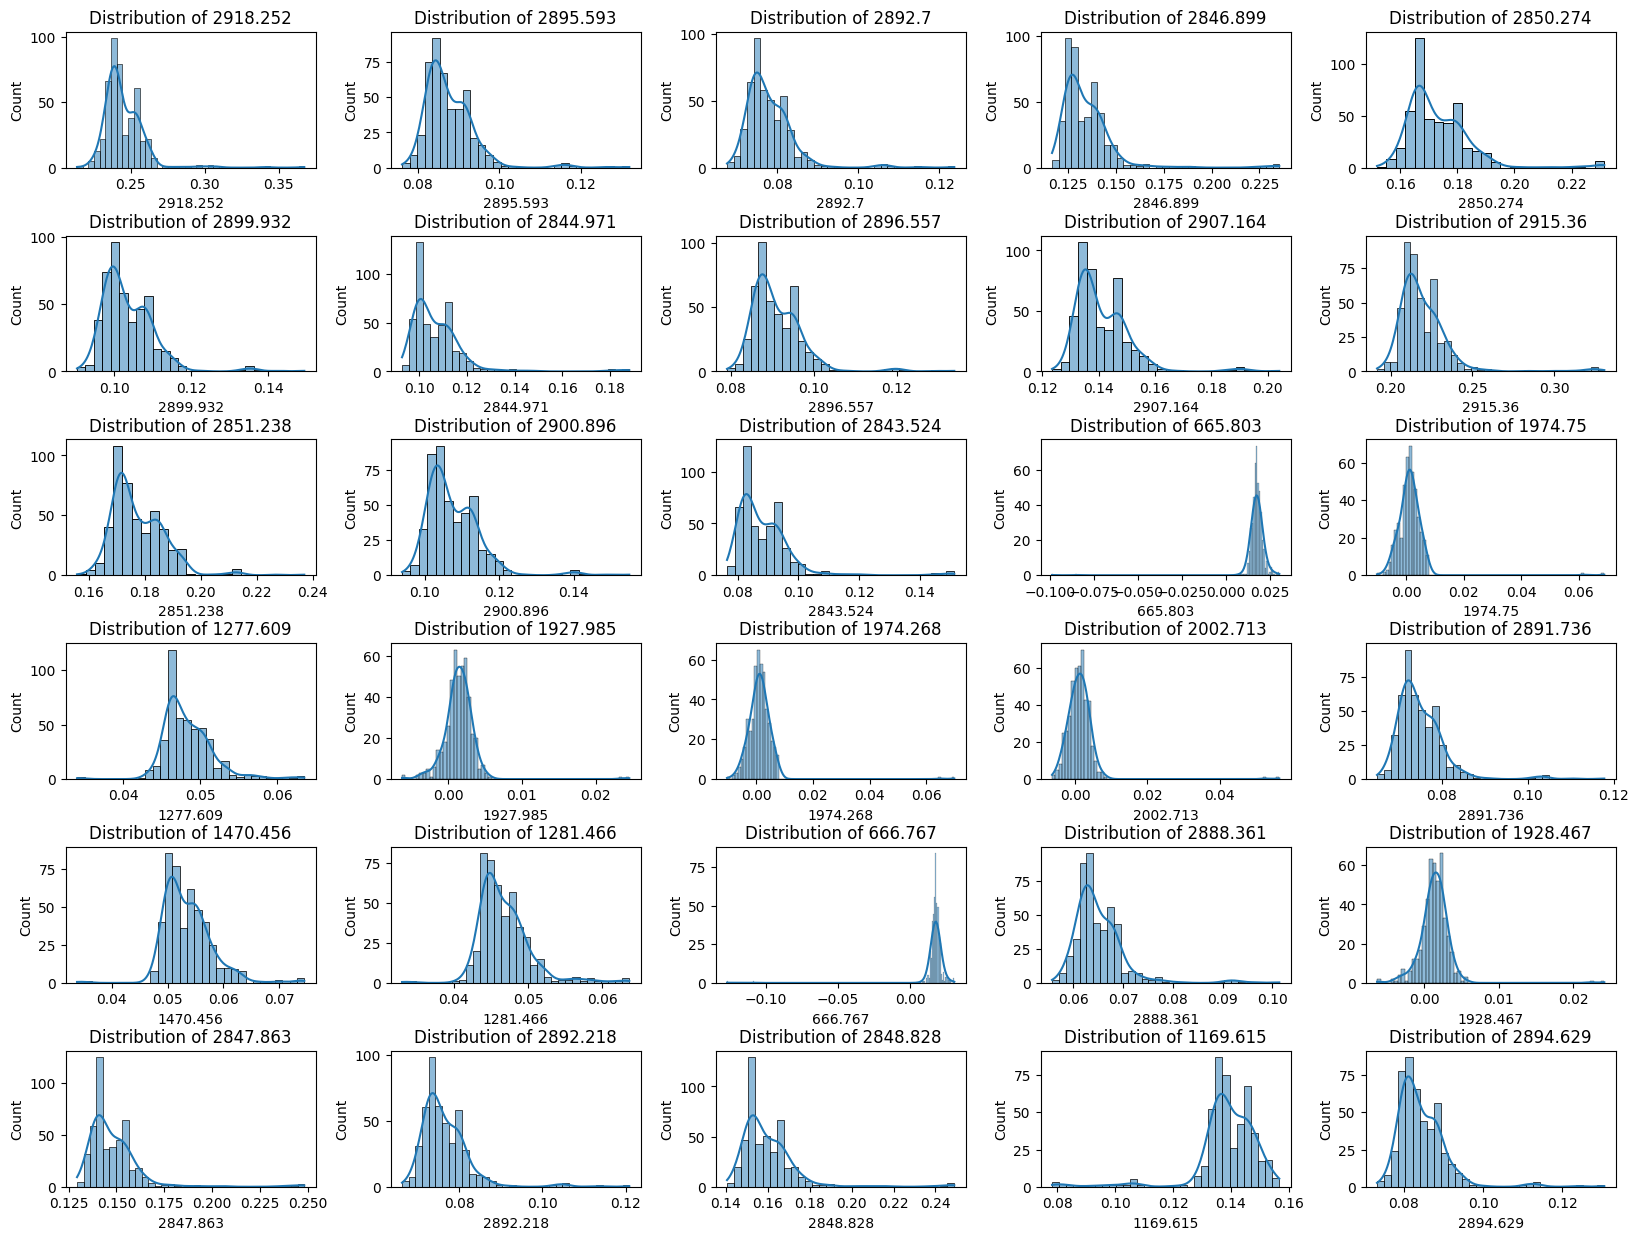

In [25]:
# Plot the distribution of the top 30 features in a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(top_30_features):
    row, col = divmod(i, 5)
    sns.histplot(df_2[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.show()

In [23]:
from scipy.stats import zscore

# Calculate z-scores for the top 30 features
z_scores = df_2[top_30_features].apply(zscore)

# Set a threshold for z-score
threshold = 3

# Filter out the rows where any feature's z-score is above the threshold
df_2_cleaned = df_2[(z_scores < threshold).all(axis=1)]

# Print the number of remaining samples
print(f'Number of remaining samples after removing outliers: {df_2_cleaned.shape[0]}')


Number of remaining samples after removing outliers: 455


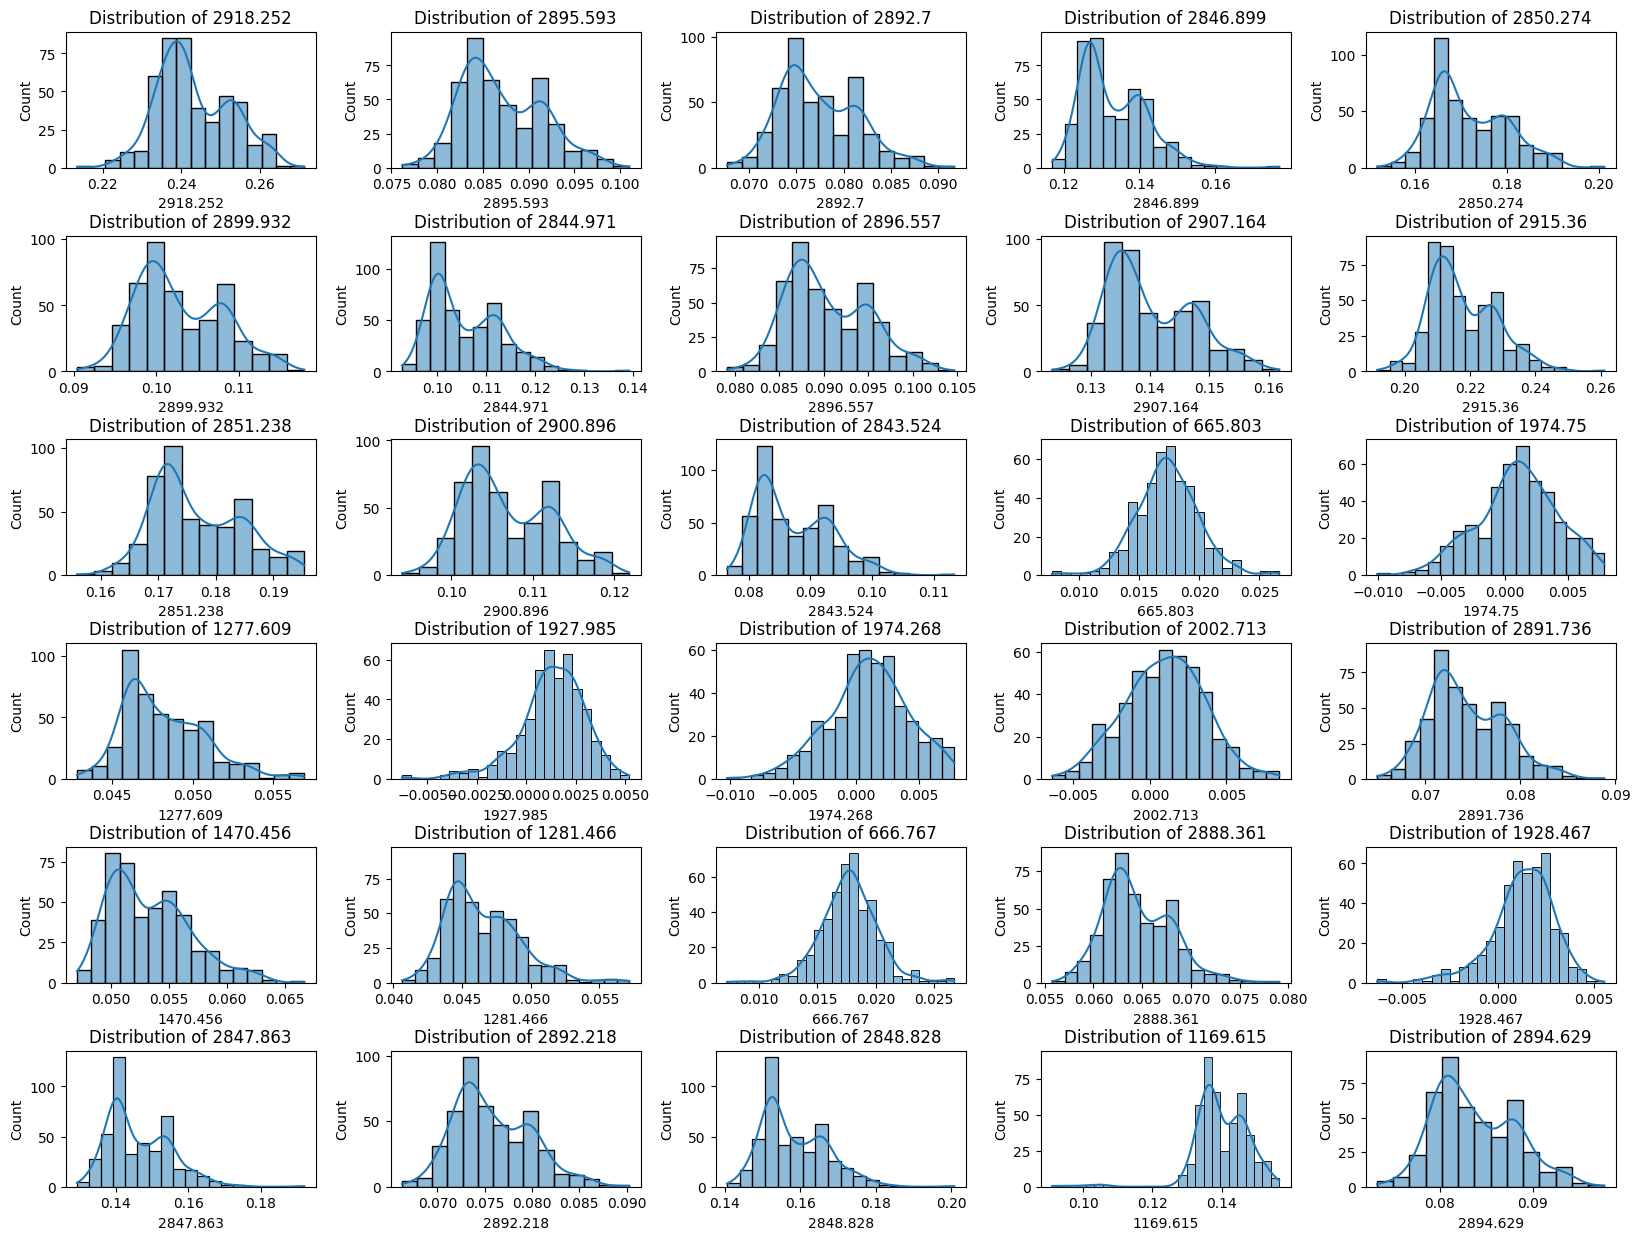

In [26]:
# Plot the distribution of the top 30 features in a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(top_30_features):
    row, col = divmod(i, 5)
    sns.histplot(df_2_cleaned[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.show()

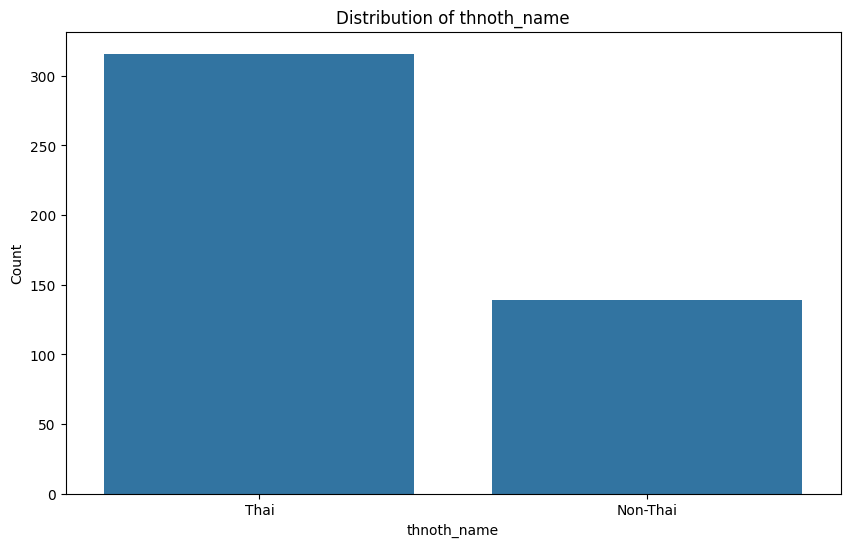

In [27]:
# Create a distribution plot for 'thnoth_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2_cleaned, x=target)
plt.title('Distribution of thnoth_name')
plt.xlabel('thnoth_name')
plt.ylabel('Count')
plt.show()

In [28]:
# Verify the new distribution
print("New distribution of thnoth_name:")
print(df_1_cleaned[target].value_counts())

New distribution of thnoth_name:
thnoth_name
Thai        316
Non-Thai    152
Name: count, dtype: int64


In [29]:
# Balancing the dataset by randomly removing additional 'Thai' samples
num_non_thai = df_1_cleaned[df_1_cleaned['thnoth_name'] == 'Non-Thai'].shape[0]
num_thai_to_remove = df_1_cleaned[df_1_cleaned['thnoth_name'] == 'Thai'].shape[0] - num_non_thai

thai_samples = df_1_cleaned[df_1_cleaned['thnoth_name'] == 'Thai']
non_thai_samples = df_1_cleaned[df_1_cleaned['thnoth_name'] == 'Non-Thai']

# Ensure not to remove all samples from any 'prov_char'
preserved_provinces = thai_samples['prov_char'].unique()
samples_to_preserve = thai_samples.groupby('prov_char').apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)

# Randomly sample from the remaining Thai samples to remove
remaining_thai_samples = thai_samples[~thai_samples.index.isin(samples_to_preserve.index)]
samples_to_remove = remaining_thai_samples.sample(n=num_thai_to_remove, random_state=42)

# Combine the remaining samples to create the balanced dataset
balanced_df = pd.concat([non_thai_samples, thai_samples.drop(samples_to_remove.index)])

# New distribution after balancing
print(f'New distribution of thnoth_name after balancing:\n{balanced_df["thnoth_name"].value_counts()}')


New distribution of thnoth_name after balancing:
thnoth_name
Non-Thai    152
Thai        152
Name: count, dtype: int64


C:\Users\pingk\AppData\Local\Temp\ipykernel_33224\3063647751.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples_to_preserve = thai_samples.groupby('prov_char').apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)


In [32]:
blncd_df = balanced_df.copy().reset_index(drop=True)

blncd_df

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,BBX,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,0.014849,...,0.000862,0.000858,0.000840,0.000813,0.000788,Group 3,Group 2,Group 3,Indonesia,Non-Thai
1,BBX,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,0.011799,...,0.001151,0.001114,0.001086,0.001078,0.001095,Group 3,Group 2,Group 3,Indonesia,Non-Thai
2,BBX,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,0.012372,...,0.000658,0.000470,0.000288,0.000153,0.000099,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,BBX,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,0.008484,...,0.002017,0.001975,0.001903,0.001802,0.001685,Group 3,Group 2,Group 3,Indonesia,Non-Thai
4,BBX,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,0.010621,...,0.002369,0.002324,0.002266,0.002196,0.002118,Group 3,Group 2,Group 3,Indonesia,Non-Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,TRG,TH,TH-TRG-012-2312-002_008,0.011975,0.011237,0.010813,0.010728,0.010925,0.011282,0.011672,...,0.000922,0.000922,0.000928,0.000938,0.000955,Group 2,Group 1,Group 2,Thailand,Thai
300,TRG,TH,TH-TRG-012-2312-002_009,0.011841,0.011934,0.012272,0.012805,0.013440,0.014059,0.014554,...,0.000972,0.000947,0.000923,0.000906,0.000903,Group 2,Group 1,Group 2,Thailand,Thai
301,TRG,TH,TH-TRG-012-2312-004_002,0.010765,0.011136,0.011711,0.012432,0.013259,0.014173,0.015169,...,0.003952,0.003989,0.004035,0.004086,0.004135,Group 2,Group 1,Group 2,Thailand,Thai
302,TRG,TH,TH-TRG-018-2311-001_002,0.013717,0.013979,0.014267,0.014573,0.014852,0.015038,0.015085,...,0.000685,0.000751,0.000862,0.000990,0.001107,Group 2,Group 1,Group 2,Thailand,Thai


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `

Mean Accuracy: 0.7559365214241257
Mean Precision: 0.9583333333333334
Mean Recall: 0.7559365214241257
Mean F1-score: 0.8147566270431116
Left out group: ['BBX'], Accuracy: 0.0
Left out group: ['CBI'], Accuracy: 1.0
Left out group: ['CCO'], Accuracy: 1.0
Left out group: ['CPN'], Accuracy: 1.0
Left out group: ['JHR'], Accuracy: 1.0
Left out group: ['KBI'], Accuracy: 0.9473684210526315
Left out group: ['KBX'], Accuracy: 0.1111111111111111
Left out group: ['KTX'], Accuracy: 0.5365853658536586
Left out group: ['NRT'], Accuracy: 1.0
Left out group: ['NWT'], Accuracy: 1.0
Left out group: ['PKN'], Accuracy: 1.0
Left out group: ['PLG'], Accuracy: 0.6666666666666666
Left out group: ['PNA'], Accuracy: 1.0
Left out group: ['PTN'], Accuracy: 0.5
Left out group: ['RIX'], Accuracy: 0.38095238095238093
Left out group: ['RNG'], Accuracy: 0.7142857142857143
Left out group: ['SGR'], Accuracy: 1.0
Left out group: ['SKM'], Accuracy: 1.0
Left out group: ['SNI'], Accuracy: 0.8214285714285714
Left out group: ['

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


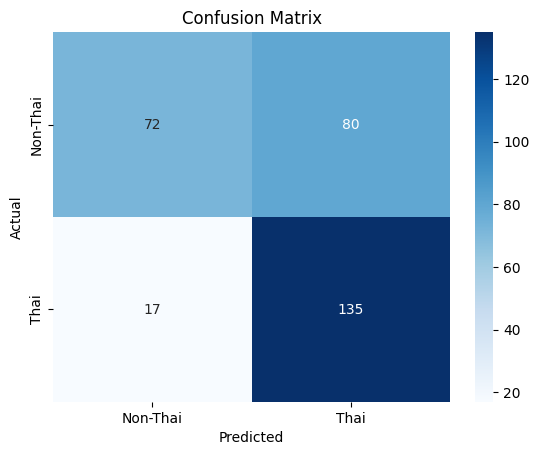

In [33]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Encode the 'thnoth_name' column
le_thnoth = LabelEncoder()
blncd_df['thnoth_name_encoded'] = le_thnoth.fit_transform(blncd_df['thnoth_name'])

# Encode the 'prov_char' column for grouping
le_prov = LabelEncoder()
blncd_df['prov_char_encoded'] = le_prov.fit_transform(blncd_df['prov_char'])

# Define the features and target
numeric_cols = blncd_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('thnoth_name_encoded')
X_balanced = blncd_df[numeric_cols]
y_balanced = blncd_df['thnoth_name_encoded']

# Train a RandomForest model
rf = RandomForestClassifier(random_state=42)

# Perform LOGO-CV
logo = LeaveOneGroupOut()
prov_char_encoded = blncd_df['prov_char_encoded']

# Arrays to store results
accuracies = []
precisions = []
recalls = []
f1_scores = []
left_out_groups = []
all_y_test = []
all_y_pred = []

# Perform LOGO-CV
for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=prov_char_encoded):
    X_train, X_test = X_balanced.iloc[train_idx], X_balanced.iloc[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    left_out_groups.append(blncd_df['prov_char'].iloc[test_idx].unique())
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

# Calculate mean scores
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1-score: {mean_f1}')

# Display left out groups and their accuracies
for group, acc in zip(left_out_groups, accuracies):
    print(f'Left out group: {group}, Accuracy: {acc}')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_thnoth.classes_, yticklabels=le_thnoth.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()